In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
plt.style.use("seaborn")

# 07 - Integration and Differentiation


#### Excercise 1
The file `velocities.txt` contains data of a particle's velocity in two columns. The first column is the time $t$ in seconds, and the second column is the velocity $v$ in meters/second. 

Write a program to read in the data and calculate the approximate distance traveled by the particle in the $x$ direction as a function of time. Do not just calculate the total distance traveled, calulate $x(t)$.

Use [`scipy.integrate.trapz`][1]. Plot both $v(t)$ and $x(t)$ in the same figure.

[1]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapz.html

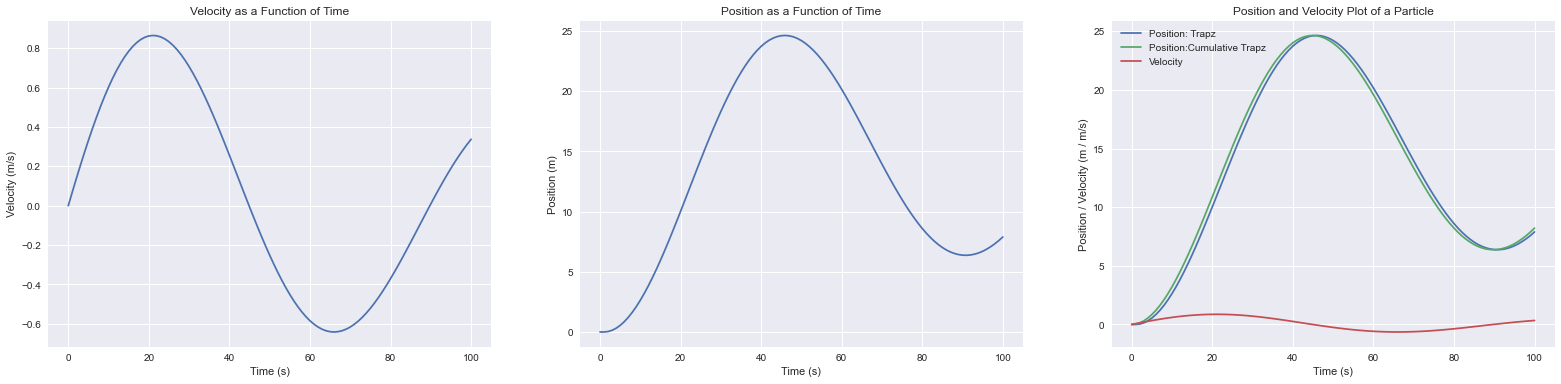

In [2]:
data = np.genfromtxt("velocities.txt")
time = data[:,0]
velocity = data[:,1]

# This assumes that x0 (the initial position) is 0 -> x0 = 0
positionTrapz = np.array([spi.trapz(velocity[0:i], time[0:i]) for i in range(time.shape[0])])
positionCumulativeTrapz = spi.cumulative_trapezoid(velocity, time, initial=0)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[27,6])

ax[0].plot(time, velocity)
ax[0].set_title("Velocity as a Function of Time")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Velocity (m/s)")

ax[1].plot(time, positionTrapz)
ax[1].set_title("Position as a Function of Time")
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Position (m)")

ax[2].plot(time, positionTrapz, label="Position: Trapz")
ax[2].plot(time, positionCumulativeTrapz, label="Position:Cumulative Trapz")
ax[2].plot(time, velocity, label="Velocity")
ax[2].set_title("Position and Velocity Plot of a Particle")
ax[2].set_xlabel("Time (s)")
ax[2].set_ylabel("Position / Velocity (m / m/s)")
ax[2].legend(loc="upper left")

plt.show()
plt.close()

#### Excercise 2

Extend the trapizoidal rule function I provided from the lecture notes to integrate the folowing function with **Simpson's rule** on 10 or more points.

$$I = \int^{2}_{0} (x^2-2x+1) \mathrm{d}x$$


Compare your results with what you obtain from using [`scipy.integrate.simps`][1] (scipy version 1.5.4 or earlier) or [`scipy.integrate.simpson`][2] (scipy version 1.6 forward) with the same number of points. Also compare your results with the true answer.

[1]: https://docs.scipy.org/doc/scipy-1.5.4/reference/generated/scipy.integrate.simps.html#scipy.integrate.simps
[2]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html

In [3]:
from typing import Callable
def simpson(f: Callable[[float], float], a: float, b: float, n: int) -> float:
    
    if n % 2 == 1:
        raise ValueError(f"n must be an even number - {n = } is not even!\nn is the number of sub-intervals (b - a) will be converted into.")
    
    delta = (b - a) / n

    x = np.linspace(a, b, n + 1)
    y = f(x)

    return (delta / 3) * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])

def myFunc(x: float) -> float:
    return x**2 - 2*x + 1

x = np.linspace(0, 2 ,11)
y = myFunc(x)
scipyIntegral = spi.simpson(y, x)
myIntegral = simpson(myFunc, 0, 2, 10)
trueIntegral = ((1/3)*2**3 - 2**2 + 2)

print(f"SciPy returns {scipyIntegral = }, while my method returns {myIntegral = }. The true value is {trueIntegral = }")

SciPy returns scipyIntegral = 0.6666666666666666, while my method returns myIntegral = 0.6666666666666666. The true value is trueIntegral = 0.6666666666666665


#### Excercise 3
Consider the integral
<!-- $$I(x) = \int_{0}^{a} e^{-t^2}\ \mathrm{d}t$$ -->

This seems incorrect:
$$I(x) = \int_{-a}^{a} \frac{1}{\pi\left(1+x^2\right)}\ \mathrm{d}t$$
I believe it is meant to be:
$$I(x) = \int_{-x}^{x} \frac{1}{\pi\left(1+t^2\right)}\ \mathrm{d}t$$

This is the [cumulative distribution function][1] of a <!-- normal --> Lorentzian or Cauchy distribution. 

[1]: https://en.wikipedia.org/wiki/Cumulative_distribution_function

Use [`scipy.integrate.quad`][2], and in just a few lines of of code, make a plot of $I(x)$ as a function of $x$ from -5 to 5 in steps of 0.1. This means you need to compute the integral for each value of $x$.

The result should look like $\arctan(x)$

[2]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html

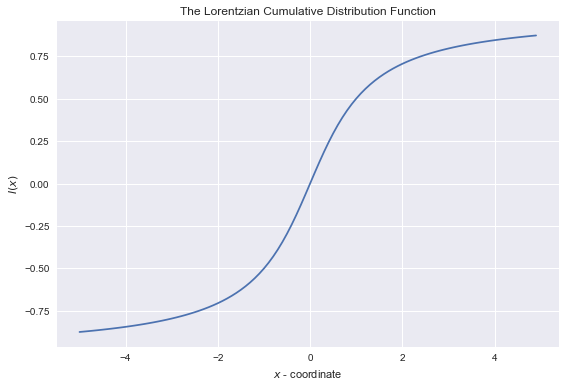

In [4]:
def cdf(x) -> float:

    def integrand(t: float) -> float:
        return 1 / (np.pi * (1 + t**2))
    
    return spi.quad(integrand, -x, x)[0] # Only care about the value, not the error

bounds = 5
dx = 0.1

x = np.arange(-bounds, bounds, dx)
y = np.array(list(map(cdf, x)))

plt.figure(figsize=[9,6])

plt.plot(x, y)
plt.xlabel("$x$ - coordinate")
plt.ylabel("$I(x)$")
plt.title("The Lorentzian Cumulative Distribution Function")

plt.show()
plt.close()

#### Excercise 4

Use the `numpy.gradient` function to perform the derivative of $f(x)=e^{-ax}$ where $a=1.2$ over the range $x=(0,4)$. Plot $f(x)$, the numerically calculated $f'(x)$, and the actual $f'(x)$ on the same plot.

How many data points did you choose to sample $f(x)$? Does it make a difference in getting closer to the actual result?

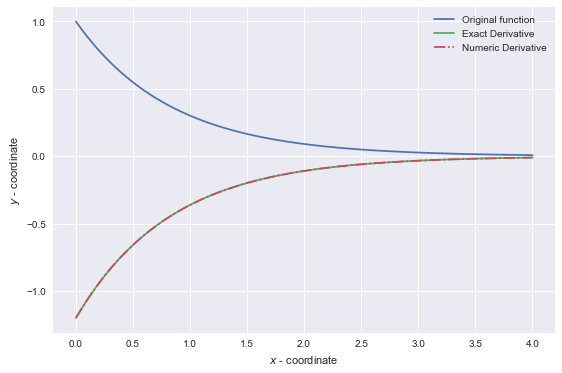

In [5]:
def f(x: float, a: float = 1.2) -> float:
    return np.exp(-a * x)

def fprime(x: float, a: float = 1.2) -> float:
    return -a*np.exp(-a*x)

x = np.linspace(0, 4, 1000)
y = f(x)
yPrimeNumeric = np.gradient(y, x)
yPrimeExact = fprime(x)

plt.figure(figsize=[9, 6])

plt.plot(x, y, label="Original function")
plt.plot(x, yPrimeExact, label="Exact Derivative")
plt.plot(x, yPrimeNumeric, label="Numeric Derivative", linestyle="-.")
plt.legend()
plt.xlabel("$x$ - coordinate")
plt.ylabel("$y$ - coordinate")

plt.show()
plt.close()


<font color="blue">`numpy.gradient` had a problem taking the derivative at the starting point. It is more noticable when the number of data points drops below about 40.</font>

#### Excercise 5
Use the [`scipy.misc.derivative`][1] function to perform the derivative of $f(x)=e^{-ax^2}$ where $a=1.2$ over the range $x=(0,4)$. Plot $f(x)$, the numerically calculated $f'(x)$, and the actual $f'(x)$ on the same plot.

[1]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html

<div class="alert alert-block alert-info">
<b>Tip:</b> When using <tt>numpy.linspace</tt> to set up the $x$ axis points, where $f'(x)$ will be calculated, use the <tt>retstep=True</tt> option. This will return the step size of the $x$-axis array, which is needed in <tt>scipy.misc.derivative</tt>.
</div>

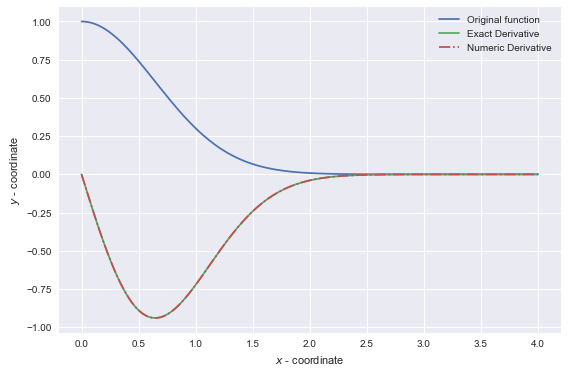

In [6]:
from scipy.misc import derivative as _derivative

def f(x: float, a: float = 1.2) -> float:
    return np.exp(-a*x**2)

def fprime(x: float, a: float = 1.2) -> float:
    return -2*a*x*np.exp(-a*x**2)

x, dx = np.linspace(0, 4, 1001, retstep=True)
y = f(x)
yPrimeExact = fprime(x)
yPrimeNumeric = _derivative(f, x, dx=dx)

plt.figure(figsize=[9, 6])

plt.plot(x, y, label="Original function")
plt.plot(x, yPrimeExact, label="Exact Derivative")
plt.plot(x, yPrimeNumeric, label="Numeric Derivative", linestyle="-.")
plt.legend()
plt.xlabel("$x$ - coordinate")
plt.ylabel("$y$ - coordinate")

plt.show()
plt.close()

#### Excercise 6
Use Equation 3.4.23 of the [NIST Digital Library][1] to program a second order derivative of any third-order polynomial over a range of positive $x$. 

<div class="alert alert-block alert-info">
    <b>Tip:</b> Lets build from the <tt>derivative</tt> function we designed during lecture, replacing the central difference formula for the <it>first</it> derivative, with the <it>second</it> derivative formula from the Handbook.
</div>

Create a function $ax^3+bx^2+cx+d$, where $a=-4,b=3,c=25,d=6$. Plot the funciton over a the range $x=(-3,3.5)$, where you can see the curves of the function, and plot the analytical second derivative over the same range. Finally add to that a plot the numerical deriviative.

Here is some pseudocode to help:
```python
# Take the second derivative of function f at point x.
# Use a default stepsize of h=0.01
def second_derivative(func,x,h=0.01) :
    temp = # the function from the NIST library 
    ...
    return temp
```
Use this function as we did in lecture. If you have points `x` and a function `f(x)`, then you can use your second derivative function to get the second derivative $y''=d^2f/dx^2$ this way:
```python
def f(x):
    ...
    
#
x = numpy.linspace(...)
y = f(x) 
ypp=second_derivative(f,x)
```

[1]: https://dlmf.nist.gov/3.4

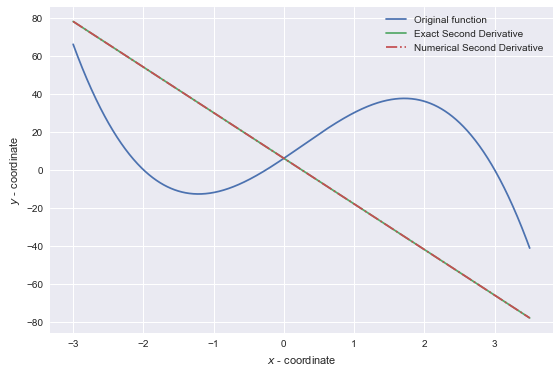

In [7]:
a = -4
b = 3
c = 25
d = 6

def f(x: float) -> float:
    return a*x**3 + b*x**2 + c*x + d

def fpp(x: float) -> float:
    return 6*a*x + 2*b

def secondDerivative(f: Callable[[float], float], dx: float = 0.1) -> Callable[[float], float]:
    def fdoubleprime(x: float) -> float:
        return (1 / (12 * dx**2)) * (-f(x + 2*dx) + 16 * f(x + dx) - 30 * f(x) + 16 * f(x - dx) - f(x - 2 * dx) )
        
    return fdoubleprime

x, dx = np.linspace(-3, 3.5, 1000, retstep=True)
y = f(x)
yppExact = fpp(x)
fdoubleprime = secondDerivative(f, dx)
yppNumeric = fdoubleprime(x)

plt.figure(figsize=[9, 6])

plt.plot(x, y, label="Original function")
plt.plot(x, yppExact, label="Exact Second Derivative")
plt.plot(x, yppNumeric, label="Numerical Second Derivative", linestyle="-.")
plt.legend()
plt.xlabel("$x$ - coordinate")
plt.ylabel("$y$ - coordinate")

plt.show()
plt.close()